Task 3

Deep Learning for MNIST Handwritten Digit Classification using PyTorch.
This is an exploration task. Develop your end-to-end workflow for solving
a Handwritten Digit Classification task using Neural Network architecture
(not Convolutional Neural Network). These are the criteria for scoring:

● Loading your MNIST dataset for the data loader
● Visualize several MNIST datasets
● Design your Neural Network model
● Setup your hyperparameter such as Loss Function, Optimizer,
Learning Rate, etc
● Develop a training loop and run a training model
● Evaluate the Model using several performance metrics such as
accuracy, confusion matrix, F1 Score, Precision, Recall, etc
● Describe and explain your Result

100%|██████████| 9912422/9912422 [00:00<00:00, 23435795.89it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 69738453.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 12515751.52it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10948579.75it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



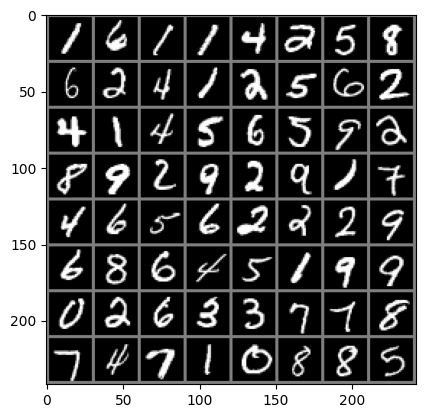

Labels: tensor([1, 6, 1, 1, 4, 2, 5, 8, 6, 2, 4, 1, 2, 5, 6, 2, 4, 1, 4, 5, 6, 5, 9, 2,
        8, 9, 2, 9, 2, 9, 1, 7, 4, 6, 5, 6, 2, 2, 2, 9, 6, 8, 6, 4, 5, 1, 9, 9,
        0, 2, 6, 3, 3, 7, 7, 8, 7, 4, 7, 1, 0, 8, 8, 5])
Epoch 1, Loss: 0.39273013916414684
Epoch 2, Loss: 0.1806347199054415
Epoch 3, Loss: 0.1331710915899337


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Loading MNIST dataset for the data loader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Step 2: Visualize several MNIST datasets
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('Labels:', labels)

# Step 3: Design your Neural Network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# Step 4: Setup your hyperparameters
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 5: Develop a training loop and run a training model
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

print('Finished Training')

# Step 6: Evaluate the Model
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

net.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
conf_matrix = confusion_matrix(all_labels, all_preds)
classification_rep = classification_report(all_labels, all_preds)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')
